# Objective 01 - Implement one-hot encoding of categorical features

In [1]:
import seaborn as sns

# bring in the penguins
penguins = sns.load_dataset('penguins')
display(penguins.head())
f'info {penguins.info()}'

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


'info None'

In [2]:
penguins.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [3]:
# imports 
import numpy as np

# select and reshape the input array
species = penguins.species[:,np.newaxis]

#import the encoder
from sklearn.preprocessing import OneHotEncoder

# instantiate the encoder as an object
enc = OneHotEncoder(sparse=False)

#use the fit_transform method(2 steps in 1)
onehot = enc.fit_transform(species)

#display every 25th row
onehot[::25]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

## Stretch Goals

In [4]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [5]:
penguins.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [6]:

#make the feature matrix with just one column by including the np.axis for the another column
islands = penguins.island[:,np.newaxis]

# import the encoder from sklearn preprocessing
from sklearn.preprocessing import OneHotEncoder

# instantiate the class
enc = OneHotEncoder(sparse=False)

# use the fit_transform to come up with the 2D feature matrix
onehot = enc.fit_transform(islands)

# display
onehot[::25]

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

# Objective 02 - Implement a univariate feature selection process


In [12]:
# import pandas and seaborn library 
import pandas as pd
import seaborn as sns
import numpy as np

# load the dataset
penguins = sns.load_dataset('penguins')

# Drop Nans
penguins.dropna(inplace=True)

# Create the features matrix
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
X = penguins[features]

# create tehe target vector
y = penguins['body_mass_g']

#import the train_test_split utility
from sklearn.model_selection import train_test_split

#create the training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [22]:
# import the feature selector utility
from sklearn.feature_selection import SelectKBest, f_regression

# create the selector object with the best k=1 features
selector = SelectKBest(score_func=f_regression, k=1)

# run the selector on the training data
X_train_selected = selector.fit_transform(X_train,y_train)

# find the features that was selected
selected_mask = selector.get_support()
all_features = X_train.columns
selected_features = all_features[selected_mask]

f'The selected features: {selected_features}'

"The selected features: Index(['flipper_length_mm'], dtype='object')"

# Objective 03 - Express and explain the intuition and interpretation of ridge regression


# Objective 04 - Use sklearn to fit and interpret ridge regression models


In [39]:
# generate the practice data set

np.random.seed(15)
x = 5 * np.random.rand(50)
y = abs(0.5*np.sin(x) + 0.5 * np.random.rand(50))*10

# create the feature matrix
X = x[:,np.newaxis]

#fit a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

# create the data for the model (best-fit line)
xfit = np.linspace(0,50,1000)
Xfit = xfit[:,np.newaxis]
yfit = model.predict(Xfit)

In [40]:
# fit a linear regression with polynomial features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(15), LinearRegression())

# create the data for the model (best-fit line)
poly_model.fit(X, y)
yfit_poly = poly_model.predict(xfit[:,np.newaxis])

In [41]:
# fit a ridge regression with polynomial features
from sklearn.linear_model import Ridge

ridge_model = make_pipeline(PolynomialFeatures(15), Ridge(alpha = 0.5, normalize = True))

ridge_model.fit(X,y)

#create the data for the model (best-fit line)
yfit_ridge = ridge_model.predict(Xfit)

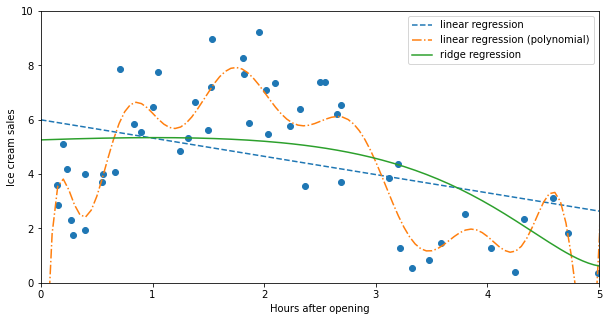

In [46]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x,y)

ax.plot(xfit, yfit, linestyle='--', label='linear regression')
ax.plot(xfit, yfit_poly, linestyle = '-.', label='linear regression (polynomial)')
ax.plot(xfit, yfit_ridge, label='ridge regression')

ax.set_ylim([0, 10])
ax.set_xlim([0, 5])

ax.set_xlabel('Hours after opening')
ax.set_ylabel('Ice cream sales')
ax.legend();

fig.show()